In [49]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)

clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")

# Display the data table for preview

mouse_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_volume = mouse_data_df.groupby(["Drug", "Timepoint"])
tumor_mean = tumor_volume["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_volume_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_mean})

#convert to columns
tumor_volume_df = tumor_volume_df.unstack('Drug')

# Remove level 0 header
tumor_volume_df.columns = tumor_volume_df.columns.get_level_values(1)

# Preview DataFrame
tumor_volume_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
sem_tumor_volume = pd.DataFrame(tumor_volume["Tumor Volume (mm3)"].sem())

#convert to columns
sem_tumor_volume = sem_tumor_volume.unstack('Drug')

# Remove level 0 header
sem_tumor_volume.columns = sem_tumor_volume.columns.get_level_values(1)

# Preview DataFrame
sem_tumor_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [4]:

reduced_tumor_volume_df = tumor_volume_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Preview that Reformatting worked
reduced_tumor_volume_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [5]:
sem_tumor_volume.columns
reduced_sem_tumor_volume = sem_tumor_volume[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
# Preview that Reformatting worked
reduced_sem_tumor_volume.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


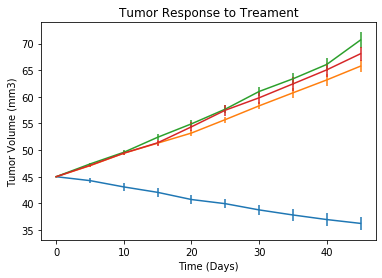

In [6]:

for column in reduced_tumor_volume_df:
    line,caps,bars=plt.errorbar(reduced_tumor_volume_df.index, reduced_tumor_volume_df[column],
                            yerr=reduced_sem_tumor_volume[column])

plt.setp(line,label=reduced_tumor_volume_df.index)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Tumor Response to Treament")
plt.show()

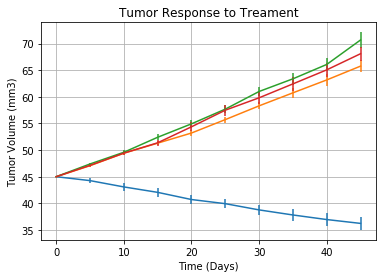

In [7]:
# Generate the Plot (with Error Bars)
#reduced_tumor_volume_df.plot(kind='line', marker= "+")


fig, ax = plt.subplots()
# reduced_tumor_volume_df.plot(marker= "+")
for column in reduced_tumor_volume_df:
    ax.errorbar(reduced_tumor_volume_df.index, reduced_tumor_volume_df[column], yerr=reduced_sem_tumor_volume[column])
   # ax.plot(reduced_tumor_volume_df)

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Tumor Response to Treament")

# Save the Figure
plt.savefig("TumorResponseToTreatment.png")
# Show the Figure
plt.grid()
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
mean_metastatic = tumor_volume["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metastatic_df = pd.DataFrame({"Metastatic Sites": mean_metastatic})

#convert to columns
mean_metastatic_df = mean_metastatic_df.unstack('Drug')

# Remove level 0 header
mean_metastatic_df.columns = mean_metastatic_df.columns.get_level_values(1)

reduced_mean_metastatic_df = mean_metastatic_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Preview that Reformatting worked
reduced_mean_metastatic_df


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [26]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame

sem_metastatic_df = pd.DataFrame(tumor_volume["Metastatic Sites"].sem())

#convert to columns
sem_metastatic_df = sem_metastatic_df.unstack('Drug')

# Remove level 0 header
sem_metastatic_df.columns = sem_metastatic_df.columns.get_level_values(1)

reduced_sem_metastatic_df = sem_metastatic_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Preview DataFrame
reduced_sem_metastatic_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


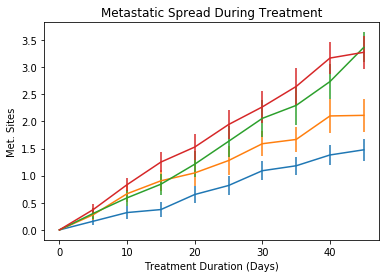

In [32]:

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

for column in reduced_mean_metastatic_df:
     ax.errorbar(reduced_mean_metastatic_df.index, reduced_mean_metastatic_df[column], yerr=reduced_sem_metastatic_df[column])

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title ("Metastatic Spread During Treatment")
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [45]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count= pd.DataFrame(tumor_volume["Mouse ID"].count())


mice_count = tumor_volume["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse ID": mice_count})

#convert to columns
mice_count_df = mice_count_df.unstack('Drug')

# Remove level 0 header
mice_count_df.columns = mice_count_df.columns.get_level_values(1)

reduced_mice_count_df= mice_count_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Preview DataFrame
reduced_mice_count_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


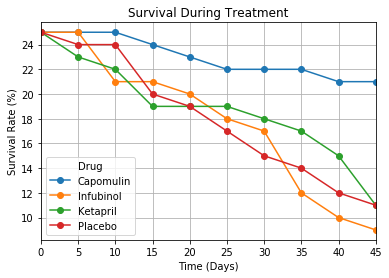

In [47]:
# Generate the Plot (Accounting for percentages)
reduced_mice_count_df.plot(marker= "o")

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title ("Survival During Treatment")

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")

# Show the Figure
plt.grid()
plt.show()

## Summary Bar Graph

In [89]:
# Calculate the percent changes for each drug
tumor_volume_df
change_df= tumor_volume_df.pct_change()
change_df


# Display data to confirm


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.016309,0.033401,0.045822,0.053093,0.039913,0.047235,0.049977,-0.023448,0.056166,0.041152
10,-0.026698,0.038322,0.049762,0.046278,0.040561,0.048758,0.039209,-0.032152,0.040743,0.039231
15,-0.023674,0.037463,0.038306,0.056829,0.045977,0.039180,0.040035,-0.024379,0.041759,0.042908
20,-0.032046,0.041182,0.037065,0.048110,0.053228,0.058503,0.044636,-0.030286,0.049253,0.047092
25,-0.019078,0.040850,0.047325,0.050219,0.057562,0.057357,0.040441,-0.031413,0.038817,0.042554
30,-0.029299,0.045717,0.046381,0.057482,0.049840,0.040473,0.048505,-0.006957,0.065175,0.041142
35,-0.024568,0.036252,0.041905,0.038974,0.052478,0.043665,0.037010,-0.032327,0.043692,0.041166
40,-0.022710,0.044883,0.039846,0.042557,0.046513,0.042167,0.044662,-0.023441,0.046695,0.047052


In [109]:
drug_list =list(change_df.columns.values)
change_df2= change_df[drug_list].sum()
change_df2


Drug
Capomulin   -0.213915
Ceftamin     0.361419
Infubinol    0.387462
Ketapril     0.463081
Naftisol     0.441938
Placebo      0.423936
Propriva     0.395437
Ramicane    -0.248656
Stelasyn     0.429455
Zoniferol    0.390680
dtype: float64

In [105]:
change_df2= change_df[drug_list].sum()
change_df3= pd.DataFrame({"Drug Change": change_df2})

change_df3["Drug Change"] = change_df3["Drug Change"].astype(float).map("{:,.2%}".format)
change_df3

,Drug Change
Drug,
Capomulin,-21.39%
Ceftamin,36.14%
Infubinol,38.75%
Ketapril,46.31%
Naftisol,44.19%
Placebo,42.39%
Propriva,39.54%
Ramicane,-24.87%
Stelasyn,42.95%


In [112]:
drug_change_ls =change_df3["Drug Change"].values()

drug_change_ls

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)